In [37]:
import torch 
from PIL import Image
from torch.optim import Adam
import matplotlib.pyplot as plt
from torch import nn, save, load
from torchvision import datasets
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor

In [38]:
train = datasets.MNIST(root="data", download=True, train=True, transform=ToTensor())
train_loader = DataLoader(train, batch_size=32, shuffle=True)

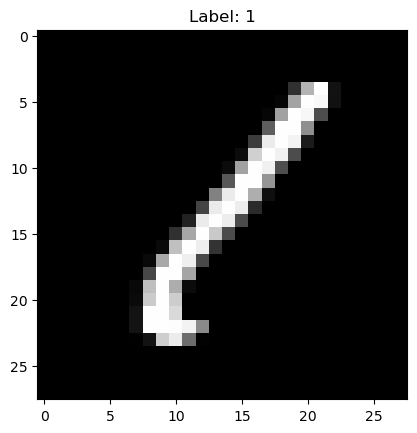

In [39]:
dataiter = iter(train_loader)
images, labels = next(dataiter)
img = images[0].squeeze() 
plt.imshow(img.numpy(), cmap="gray")
plt.title(f"Label: {labels[0].item()}")
plt.show()

In [42]:
import torch.nn as nn
import torch.nn.functional as F

class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, (3,3))
        self.conv2 = nn.Conv2d(32, 64, (3,3))
        self.conv3 = nn.Conv2d(64, 64, (3,3))

        self.fc = nn.Linear(64*(28-6)*(28-6), 10) 

    def forward(self, x):

        x = F.relu(self.conv1(x))

        x = F.relu(self.conv2(x))
 
        x = F.relu(self.conv3(x))
    
        x = x.view(x.size(0), -1)

        x = self.fc(x)
        return x

In [56]:
torch.manual_seed(42)
model=Model()
loss_fn = nn.CrossEntropyLoss() 
opt= torch.optim.Adam(model.parameters(), lr=0.01)

In [57]:
if __name__ == "__main__":

    loss_values = []
    for epoch in range(10):
        total_loss = 0.0
        batches = 0

        for batch in dataset:
            X, y = batch
            yhat = model(X)
            loss = loss_fn(yhat, y)

            opt.zero_grad()
            loss.backward()
            opt.step()

            total_loss += loss.item()  
            batches += 1

        epoch_loss = total_loss / batches  
        loss_values.append(epoch_loss)
        print(f"Epoch:{epoch} loss is {epoch_loss}")

Epoch:0 loss is 0.26320320947122916
Epoch:1 loss is 0.09810599094913341
Epoch:2 loss is 0.08956143327795046
Epoch:3 loss is 0.07526347326191608
Epoch:4 loss is 0.07018310375099099
Epoch:5 loss is 0.05998980076964314
Epoch:6 loss is 0.06945486083030619
Epoch:7 loss is 0.05675154286237005
Epoch:8 loss is 0.05445442040955446
Epoch:9 loss is 0.05334716400314295


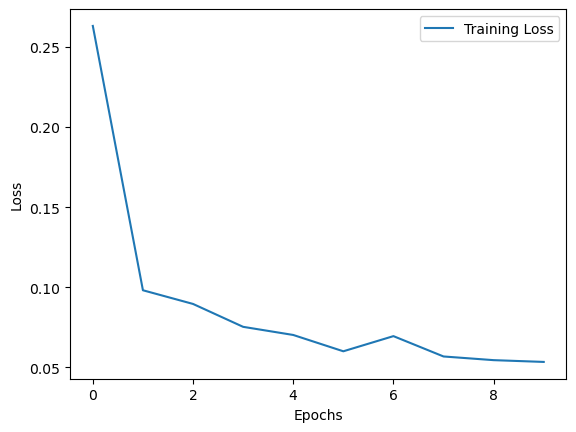

In [62]:
plt.plot(loss_values, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [63]:
with open('model_state.pt', 'wb') as f: 
    save(model.state_dict(), f) 

with open('model_state.pt', 'rb') as f: 
    model.load_state_dict(load(f))  

tensor(9)


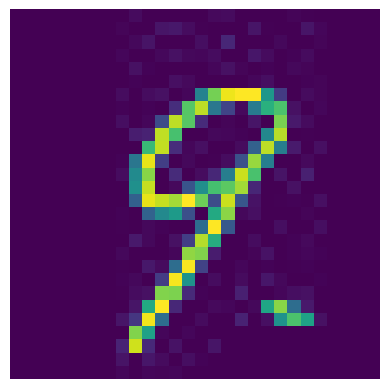

In [65]:
img_path = r'S:\Portfolio\Extra_Learning\Data_Science_practice\DL\Untitled Folder\img_3.jpg'
img = Image.open(img_path)
plt.imshow(img)
plt.axis('off') 
plt.show()

In [69]:
img = Image.open(r'S:\Portfolio\Extra_Learning\Data_Science_practice\DL\Untitled Folder\img_3.jpg') 
img_tensor = ToTensor()(img).unsqueeze(0)
print(torch.argmax(model(img_tensor)))

tensor(9)
